In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

# SCHEMA OF THE DATA

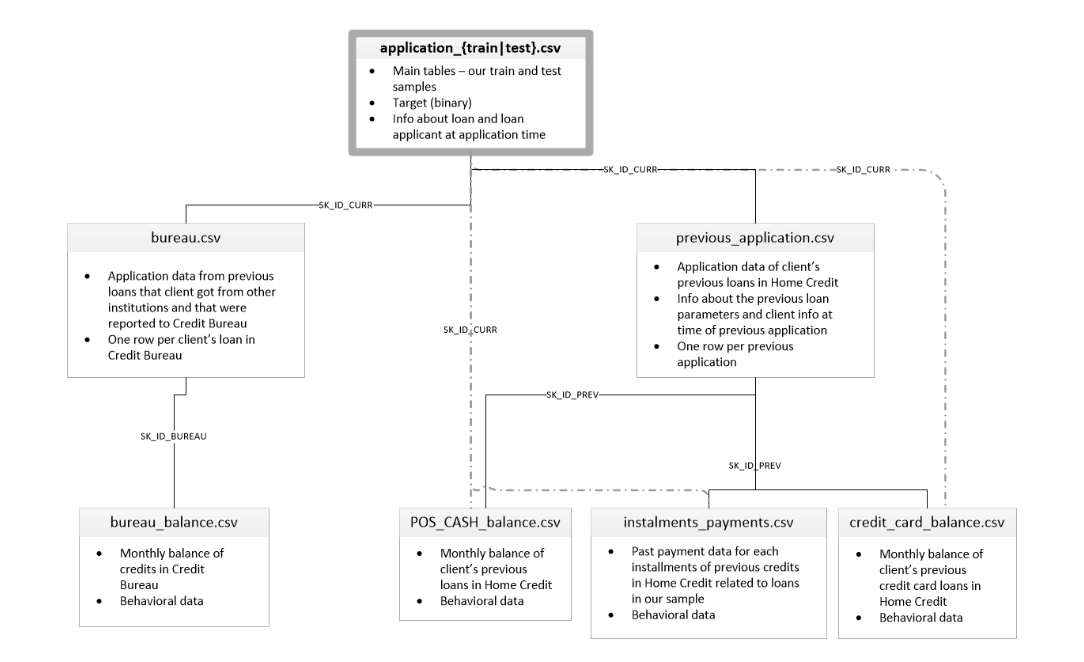



In [5]:
!ls home-credit-default-risk/

HomeCredit_columns_description.csv bureau_balance.csv
POS_CASH_balance.csv               credit_card_balance.csv
application_test.csv               installments_payments.csv
application_train.csv              previous_application.csv
bureau.csv                         sample_submission.csv


In [31]:
import pandas as pd

import time

start_time = time.time()
application_train = pd.read_csv('home-credit-default-risk/application_train.csv')
application_test = pd.read_csv('home-credit-default-risk/application_test.csv')
bureau = pd.read_csv('home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('home-credit-default-risk/bureau_balance.csv')
previous_application = pd.read_csv('home-credit-default-risk/previous_application.csv')
pos_cash_balance = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
installments_payments = pd.read_csv('home-credit-default-risk/installments_payments.csv')
credit_card_balance = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')

end_time = time.time()

print(end_time - start_time)

15.395006895065308


This is taking too long to load.. maybe I will try will with dask or polars for multithreading/Parallel data processing! Should be better for memory allocation as it uses Lazyframes.

In [32]:
import dask.dataframe as dd

import time

start_time = time.time()
application_train = dd.read_csv('home-credit-default-risk/application_train.csv')
application_test = dd.read_csv('home-credit-default-risk/application_test.csv')
bureau = dd.read_csv('home-credit-default-risk/bureau.csv')
bureau_balance = dd.read_csv('home-credit-default-risk/bureau_balance.csv')
previous_application = dd.read_csv('home-credit-default-risk/previous_application.csv')
pos_cash_balance = dd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
installments_payments = dd.read_csv('home-credit-default-risk/installments_payments.csv')
credit_card_balance = dd.read_csv('home-credit-default-risk/credit_card_balance.csv')

end_time = time.time()

print(end_time - start_time)

0.3223278522491455


In [33]:
import polars as pl

import time

start_time = time.time()
application_train = pl.scan_csv('home-credit-default-risk/application_train.csv',encoding='utf8')
application_test = pl.scan_csv('home-credit-default-risk/application_test.csv')
bureau = pl.scan_csv('home-credit-default-risk/bureau.csv')
bureau_balance = pl.scan_csv('home-credit-default-risk/bureau_balance.csv')
previous_application = pl.scan_csv('home-credit-default-risk/previous_application.csv')
pos_cash_balance = pl.scan_csv('home-credit-default-risk/POS_CASH_balance.csv')
installments_payments = pl.scan_csv('home-credit-default-risk/installments_payments.csv')
credit_card_balance = pl.scan_csv('home-credit-default-risk/credit_card_balance.csv')

end_time = time.time()
 
print(end_time - start_time)

0.008482933044433594


# For EDA I'm going to use pandas, cuz I am more familiar with it lol

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Set visual style
sns.set_palette("pastel")

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Define a function to explore each dataset
def explore_dataset(file_path, name):
    print(f"\n{'='*50}")
    print(f"EXPLORING: {name}")
    print(f"{'='*50}\n")
    
    # Load data
    df = pd.read_csv(file_path)
    
    # Basic info
    print(f"Shape: {df.shape}")
    print(f"\nSample ({min(5, len(df))} rows):")
    display(df.head(5))
    
    # Data types and missing values
    print("\nData types and missing values:")
    missing = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': (df.isnull().sum() / len(df) * 100).round(2)
    })
    display(missing)
    
    # Basic statistics for numeric columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(num_cols) > 0:
        print("\nStatistics for numeric columns:")
        display(df[num_cols].describe().T)
    
    # Categorical columns overview
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print("\nCategorical columns value counts:")
        for col in cat_cols[:min(5, len(cat_cols))]:
            print(f"\n{col}:")
            display(df[col].value_counts().head(10))
            
    return df

# Load each dataset (assuming the files are in the current directory)
application_train = explore_dataset('home-credit-default-risk/application_train.csv', 'Application Train')
bureau = explore_dataset('home-credit-default-risk/bureau.csv', 'Bureau')
bureau_balance = explore_dataset('home-credit-default-risk/bureau_balance.csv', 'Bureau Balance')
prev_app = explore_dataset('home-credit-default-risk/previous_application.csv', 'Previous Application')
pos_cash = explore_dataset('home-credit-default-risk/POS_CASH_balance.csv', 'POS Cash Balance')
installments = explore_dataset('home-credit-default-risk/installments_payments.csv', 'Installments Payments')
cc_balance = explore_dataset('home-credit-default-risk/credit_card_balance.csv', 'Credit Card Balance')


EXPLORING: Application Train

Shape: (307511, 122)

Sample (5 rows):


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /


Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_CURR,int64,0,0.0
TARGET,int64,0,0.0
NAME_CONTRACT_TYPE,object,0,0.0
CODE_GENDER,object,0,0.0
FLAG_OWN_CAR,object,0,0.0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,float64,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,13.5



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0



Categorical columns value counts:

NAME_CONTRACT_TYPE:


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


CODE_GENDER:


CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


FLAG_OWN_CAR:


FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


FLAG_OWN_REALTY:


FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


NAME_TYPE_SUITE:


NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


EXPLORING: Bureau

Shape: (1716428, 17)

Sample (5 rows):


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_CURR,int64,0,0.00
SK_ID_BUREAU,int64,0,0.00
CREDIT_ACTIVE,object,0,0.00
CREDIT_CURRENCY,object,0,0.00
DAYS_CREDIT,int64,0,0.00
CREDIT_DAY_OVERDUE,int64,0,0.00
DAYS_CREDIT_ENDDATE,float64,105553,6.15
DAYS_ENDDATE_FACT,float64,633653,36.92
AMT_CREDIT_MAX_OVERDUE,float64,1124488,65.51
CNT_CREDIT_PROLONG,int64,0,0.00



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,100001.000,188866.75,278055.0,367426.00,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5000000.000,5463953.75,5926303.5,6385681.25,6.843457e+06
DAYS_CREDIT,1716428.0,-1.142108e+03,7.951649e+02,-2922.000,-1666.00,-987.0,-474.00,0.000000e+00
CREDIT_DAY_OVERDUE,1716428.0,8.181666e-01,3.654443e+01,0.000,0.00,0.0,0.00,2.792000e+03
DAYS_CREDIT_ENDDATE,1610875.0,5.105174e+02,4.994220e+03,-42060.000,-1138.00,-330.0,474.00,3.119900e+04
DAYS_ENDDATE_FACT,1082775.0,-1.017437e+03,7.140106e+02,-42023.000,-1489.00,-897.0,-425.00,0.000000e+00
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000,0.00,0.0,0.00,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000,0.00,0.0,0.00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000,51300.00,125518.5,315000.00,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4705600.320,0.00,0.0,40153.50,1.701000e+08



Categorical columns value counts:

CREDIT_ACTIVE:


CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64


CREDIT_CURRENCY:


CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64


CREDIT_TYPE:


CREDIT_TYPE
Consumer credit                           1251615
Credit card                                402195
Car loan                                    27690
Mortgage                                    18391
Microloan                                   12413
Loan for business development                1975
Another type of loan                         1017
Unknown type of loan                          555
Loan for working capital replenishment        469
Cash loan (non-earmarked)                      56
Name: count, dtype: int64


EXPLORING: Bureau Balance

Shape: (27299925, 3)

Sample (5 rows):


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_BUREAU,int64,0,0.0
MONTHS_BALANCE,int64,0,0.0
STATUS,object,0,0.0



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,27299925.0,6.036297e+06,492348.856904,5001709.0,5730933.0,6070821.0,6431951.0,6842888.0
MONTHS_BALANCE,27299925.0,-3.074169e+01,23.864509,-96.0,-46.0,-25.0,-11.0,0.0



Categorical columns value counts:

STATUS:


STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64


EXPLORING: Previous Application

Shape: (1670214, 37)

Sample (5 rows):


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_PREV,int64,0,0.00
SK_ID_CURR,int64,0,0.00
NAME_CONTRACT_TYPE,object,0,0.00
AMT_ANNUITY,float64,372235,22.29
AMT_APPLICATION,float64,0,0.00
AMT_CREDIT,float64,1,0.00
AMT_DOWN_PAYMENT,float64,895844,53.64
AMT_GOODS_PRICE,float64,385515,23.08
WEEKDAY_APPR_PROCESS_START,object,0,0.00
HOUR_APPR_PROCESS_START,int64,0,0.00



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762386,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616547,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000



Categorical columns value counts:

NAME_CONTRACT_TYPE:


NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64


WEEKDAY_APPR_PROCESS_START:


WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64


FLAG_LAST_APPL_PER_CONTRACT:


FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64


NAME_CASH_LOAN_PURPOSE:


NAME_CASH_LOAN_PURPOSE
XAP                             922661
XNA                             677918
Repairs                          23765
Other                            15608
Urgent needs                      8412
Buying a used car                 2888
Building a house or an annex      2693
Everyday expenses                 2416
Medicine                          2174
Payments on other loans           1931
Name: count, dtype: int64


NAME_CONTRACT_STATUS:


NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64


EXPLORING: POS Cash Balance

Shape: (10001358, 8)

Sample (5 rows):


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0



Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_PREV,int64,0,0.00
SK_ID_CURR,int64,0,0.00
MONTHS_BALANCE,int64,0,0.00
CNT_INSTALMENT,float64,26071,0.26
CNT_INSTALMENT_FUTURE,float64,26087,0.26
NAME_CONTRACT_STATUS,object,0,0.00
SK_DPD,int64,0,0.00
SK_DPD_DEF,int64,0,0.00



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0



Categorical columns value counts:

NAME_CONTRACT_STATUS:


NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64


EXPLORING: Installments Payments

Shape: (13605401, 8)

Sample (5 rows):


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585



Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_PREV,int64,0,0.00
SK_ID_CURR,int64,0,0.00
NUM_INSTALMENT_VERSION,float64,0,0.00
NUM_INSTALMENT_NUMBER,int64,0,0.00
DAYS_INSTALMENT,float64,0,0.00
DAYS_ENTRY_PAYMENT,float64,2905,0.02
AMT_INSTALMENT,float64,0,0.00
AMT_PAYMENT,float64,2905,0.02



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845



EXPLORING: Credit Card Balance

Shape: (3840312, 23)

Sample (5 rows):


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



Data types and missing values:


,Data Type,Missing Values,Percentage Missing
SK_ID_PREV,int64,0,0.00
SK_ID_CURR,int64,0,0.00
MONTHS_BALANCE,int64,0,0.00
AMT_BALANCE,float64,0,0.00
AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.00
AMT_DRAWINGS_ATM_CURRENT,float64,749816,19.52
AMT_DRAWINGS_CURRENT,float64,0,0.00
AMT_DRAWINGS_OTHER_CURRENT,float64,749816,19.52
AMT_DRAWINGS_POS_CURRENT,float64,749816,19.52
AMT_INST_MIN_REGULARITY,float64,305236,7.95



Statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,1.904504e+06,536469.470563,1000018.000,1434385.00,1897122.0,2.369328e+06,2843496.000
SK_ID_CURR,3840312.0,2.783242e+05,102704.475133,100006.000,189517.00,278396.0,3.675800e+05,456250.000
MONTHS_BALANCE,3840312.0,-3.452192e+01,26.667751,-96.000,-55.00,-28.0,-1.100000e+01,-1.000
AMT_BALANCE,3840312.0,5.830016e+04,106307.031024,-420250.185,0.00,0.0,8.904669e+04,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,1.538080e+05,165145.699525,0.000,45000.00,112500.0,1.800000e+05,1350000.000
AMT_DRAWINGS_ATM_CURRENT,3090496.0,5.961325e+03,28225.688578,-6827.310,0.00,0.0,0.000000e+00,2115000.000
AMT_DRAWINGS_CURRENT,3840312.0,7.433388e+03,33846.077333,-6211.620,0.00,0.0,0.000000e+00,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,2.881696e+02,8201.989345,0.000,0.00,0.0,0.000000e+00,1529847.000
AMT_DRAWINGS_POS_CURRENT,3090496.0,2.968805e+03,20796.887047,0.000,0.00,0.0,0.000000e+00,2239274.160
AMT_INST_MIN_REGULARITY,3535076.0,3.540204e+03,5600.154122,0.000,0.00,0.0,6.633911e+03,202882.005



Categorical columns value counts:

NAME_CONTRACT_STATUS:


NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64

### Target Variable Distribution

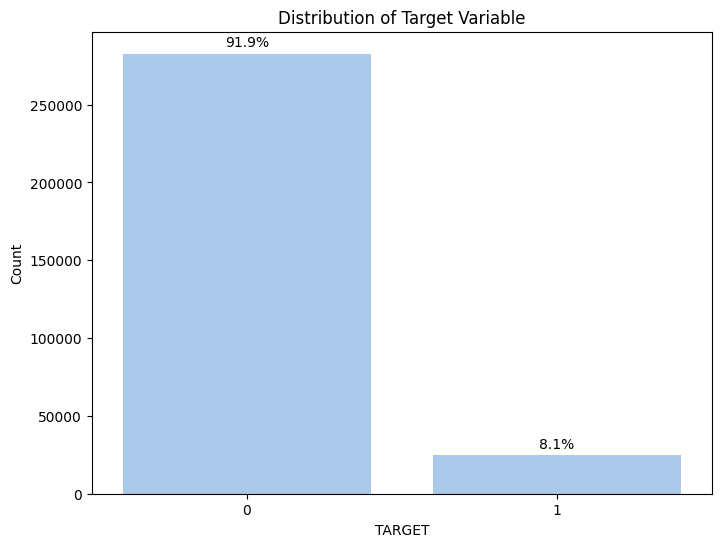

In [39]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=application_train)
plt.title('Distribution of Target Variable')
plt.ylabel('Count')
target_counts = application_train['TARGET'].value_counts(normalize=True) * 100
for i, count in enumerate(application_train['TARGET'].value_counts()):
    percentage = target_counts.iloc[i]
    plt.annotate(f"{percentage:.1f}%", 
                 xy=(i, count), 
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center')
plt.show()

## How to interpret: 

This visualization shows the distribution of the target variable (default vs. non-default). An imbalanced distribution (which is common in default prediction) would require special consideration during modeling, such as class weighting or sampling techniques.

## Feature Correlation

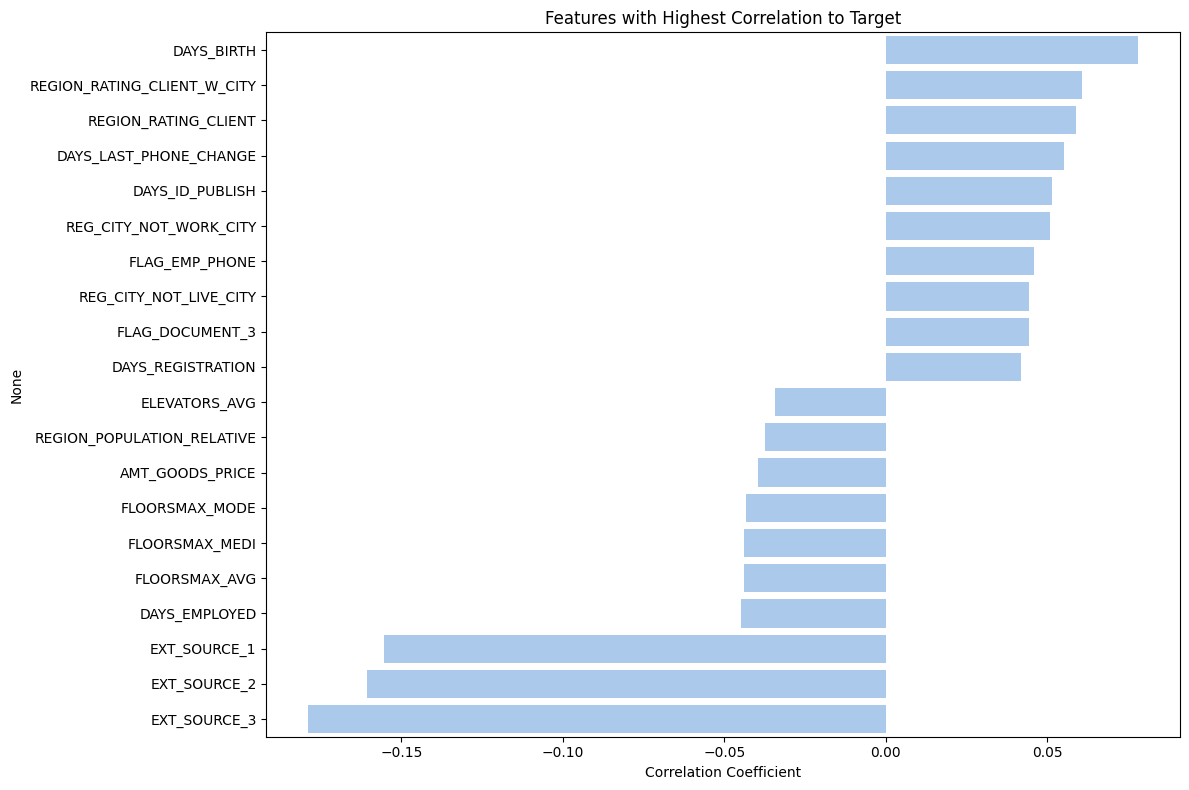

In [40]:
# Select numeric columns from application data
numeric_cols = application_train.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('TARGET') if 'TARGET' in numeric_cols else numeric_cols

# Calculate correlation with target
correlations = application_train[numeric_cols].corrwith(application_train['TARGET']).sort_values(ascending=False)

# Plot top positive and negative correlations
plt.figure(figsize=(12, 8))
top_corrs = pd.concat([correlations.head(10), correlations.tail(10)])
sns.barplot(x=top_corrs.values, y=top_corrs.index)
plt.title('Features with Highest Correlation to Target')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

### How to interpret: 

This visualization shows the distribution of the target variable (default vs. non-default). An imbalanced distribution (which is common in default prediction) would require special consideration during modeling, such as class weighting or sampling techniques.

## Missing Values

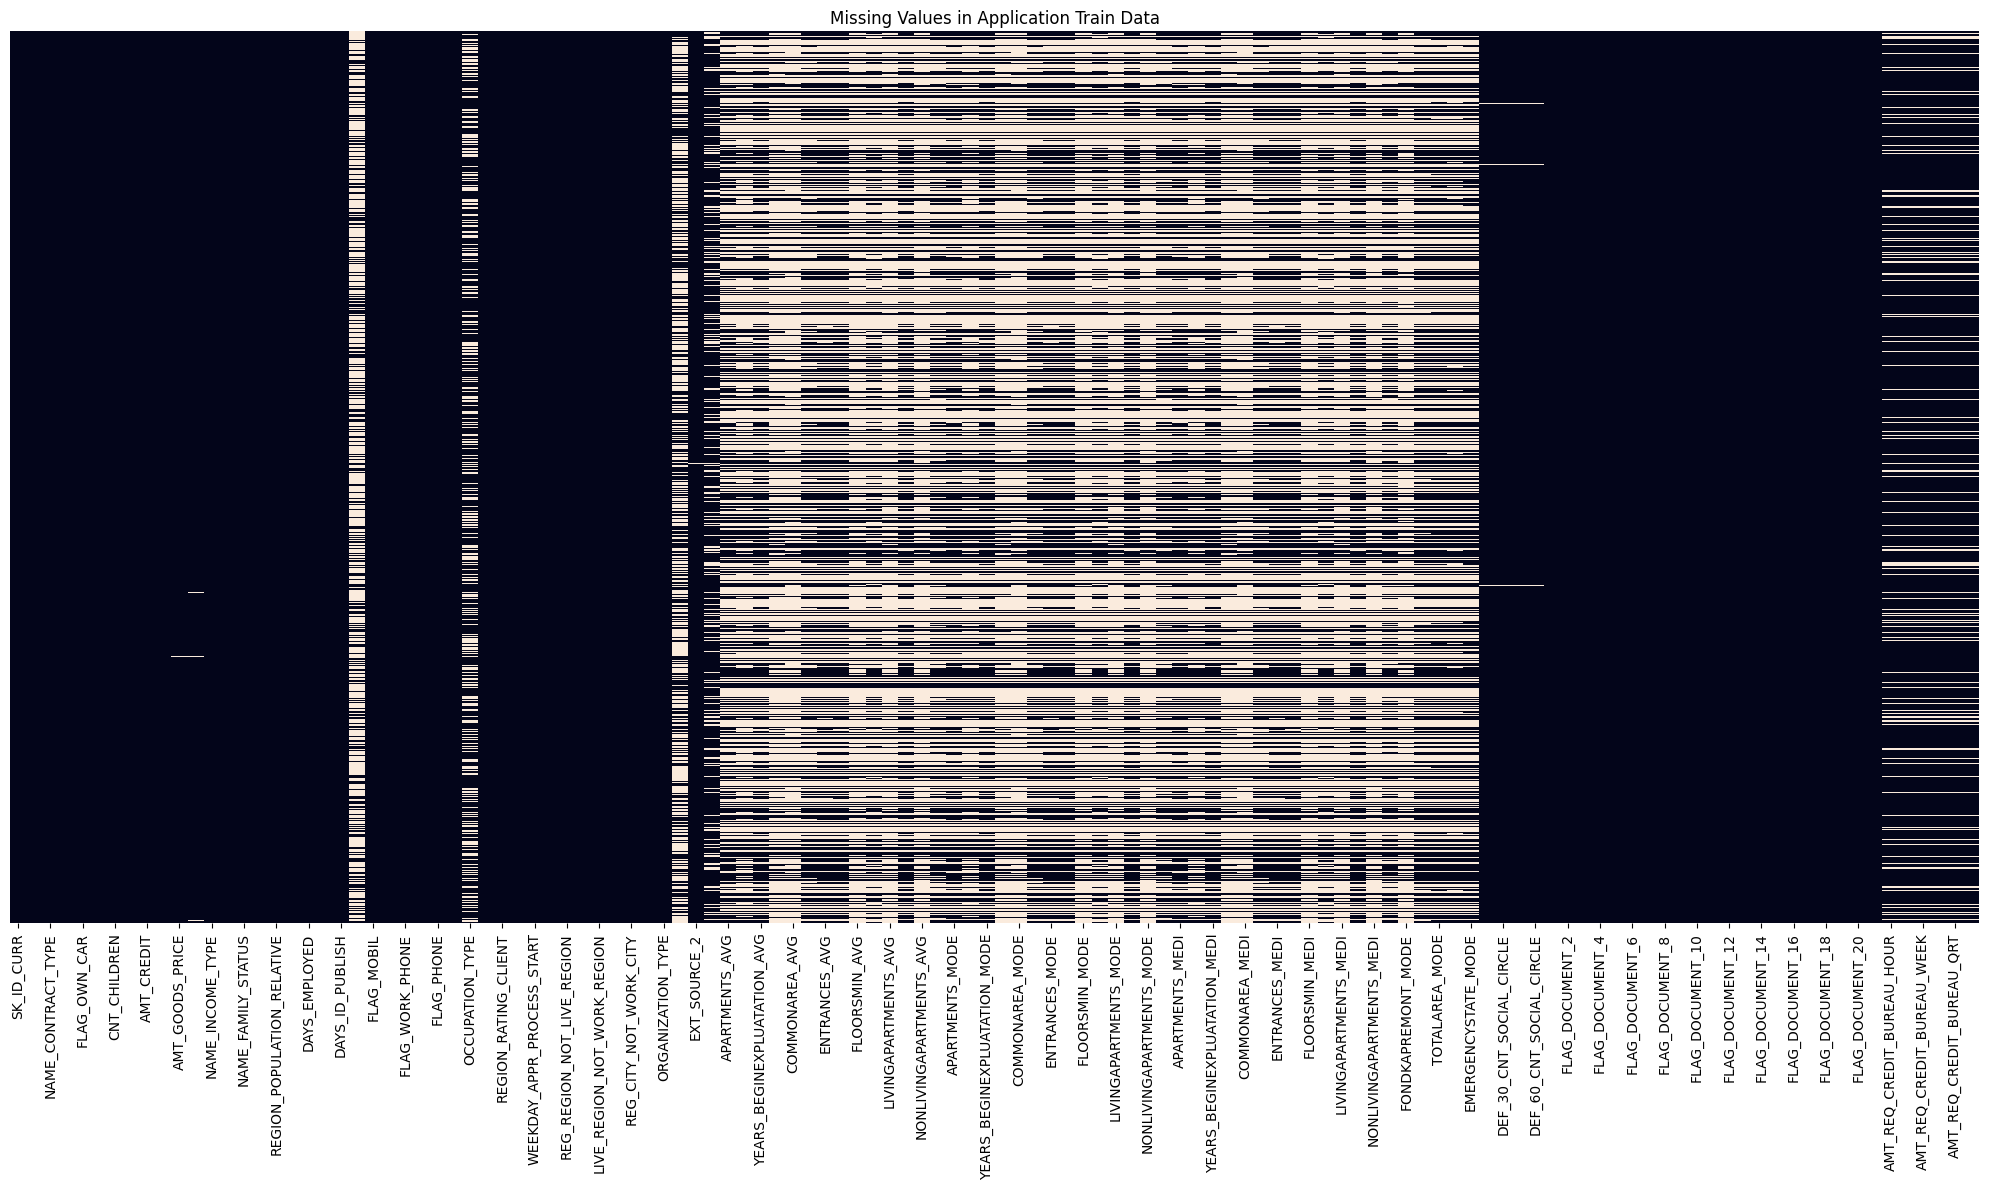

In [41]:
# Missing values heatmap for application data
plt.figure(figsize=(20, 12))
sns.heatmap(application_train.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values in Application Train Data')
plt.tight_layout()
plt.show()

### How to interpret: 

This heatmap visually identifies patterns of missing data. Vertical lines indicate features with many missing values, which might need imputation or could be dropped. Horizontal lines could indicate specific applicants with incomplete information.

## Join-Key Integrity

In [42]:
# Check SK_ID_CURR integrity across tables
print("SK_ID_CURR unique count in application_train:", application_train['SK_ID_CURR'].nunique())
print("SK_ID_CURR unique count in bureau:", bureau['SK_ID_CURR'].nunique())
print("SK_ID_CURR unique count in previous_application:", prev_app['SK_ID_CURR'].nunique())

# Check overlap
in_app_and_bureau = len(set(application_train['SK_ID_CURR']) & set(bureau['SK_ID_CURR']))
in_app_and_prev = len(set(application_train['SK_ID_CURR']) & set(prev_app['SK_ID_CURR']))

print(f"Clients in both application and bureau: {in_app_and_bureau}")
print(f"Clients in both application and previous applications: {in_app_and_prev}")

SK_ID_CURR unique count in application_train: 307511
SK_ID_CURR unique count in bureau: 305811
SK_ID_CURR unique count in previous_application: 338857
Clients in both application and bureau: 263491
Clients in both application and previous applications: 291057


## How to interpret: 

This analysis checks how well the tables can be joined. It identifies how many clients have records in multiple tables, which affects the completeness of information after joining. Low overlap could indicate data quality issues or that many applicants are new clients.

Sort of easy to understand that,

application_train: 307,511 unique clients
bureau: 305,811 unique clients with credit bureau records
previous_application: 338,857 unique clients with previous applications


Overlap!

Only 263,491 clients (85.7% of application_train) appear in both application_train and bureau datasets
291,057 clients (94.6% of application_train) appear in both application_train and previous_application datasets


Bureau Data Gap: About 14.3% of applicants (44,020 clients) in the training set have no credit bureau history. Speculating that:

New borrowers with no credit history
Clients whose records weren't found in the bureau
Data quality issues

Previous Application Gap: About 5.4% of applicants (16,454 clients) in the training set have no previous application history with this institution. These are likely new customers.
Previous Application Excess: The previous_application dataset contains 31,346 clients not in the application_train dataset. These could be:

Clients in the test set
Historical clients who aren't currently applying for loans
Data from a different time period

## Bureau Data

In [49]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'SK_ID_BUREAU': 'count',
    'DAYS_CREDIT': ['min', 'max', 'mean', 'std'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean', 'sum'],
})
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]

app_and_bureau = application_train[['SK_ID_CURR', 'TARGET']].merge(
    bureau_agg, on='SK_ID_CURR', how='left')

bureau_corrs = app_and_bureau.corr()['TARGET'].sort_values()
print("Top Bureau Features Correlated with Target:")
print(bureau_corrs.head(10))
print("\nBottom Bureau Features Correlated with Target:")
print(bureau_corrs.tail(10))

Top Bureau Features Correlated with Target:
DAYS_CREDIT_std            -0.050064
AMT_CREDIT_SUM_mean        -0.019957
AMT_CREDIT_SUM_max         -0.019737
AMT_CREDIT_SUM_sum         -0.014057
AMT_CREDIT_SUM_DEBT_max    -0.002173
SK_ID_CURR                 -0.002108
AMT_ANNUITY_mean           -0.001391
AMT_CREDIT_SUM_DEBT_mean   -0.000637
AMT_ANNUITY_max             0.001120
AMT_ANNUITY_sum             0.001975
Name: TARGET, dtype: float64

Bottom Bureau Features Correlated with Target:
CREDIT_DAY_OVERDUE_max         0.005493
AMT_CREDIT_SUM_DEBT_sum        0.007144
AMT_CREDIT_SUM_OVERDUE_mean    0.007150
CREDIT_DAY_OVERDUE_mean        0.008118
AMT_CREDIT_SUM_OVERDUE_max     0.010614
AMT_CREDIT_SUM_OVERDUE_sum     0.013335
DAYS_CREDIT_max                0.049782
DAYS_CREDIT_min                0.075248
DAYS_CREDIT_mean               0.089729
TARGET                         1.000000
Name: TARGET, dtype: float64


## How to interpret: 

This aggregation converts bureau data from loan-level to client-level, summarizing clients' credit history from other institutions. The correlation analysis shows which credit bureau features are most predictive of default. Features with strong correlations might include history of overdue payments, high debt ratios, or frequent credit applications.

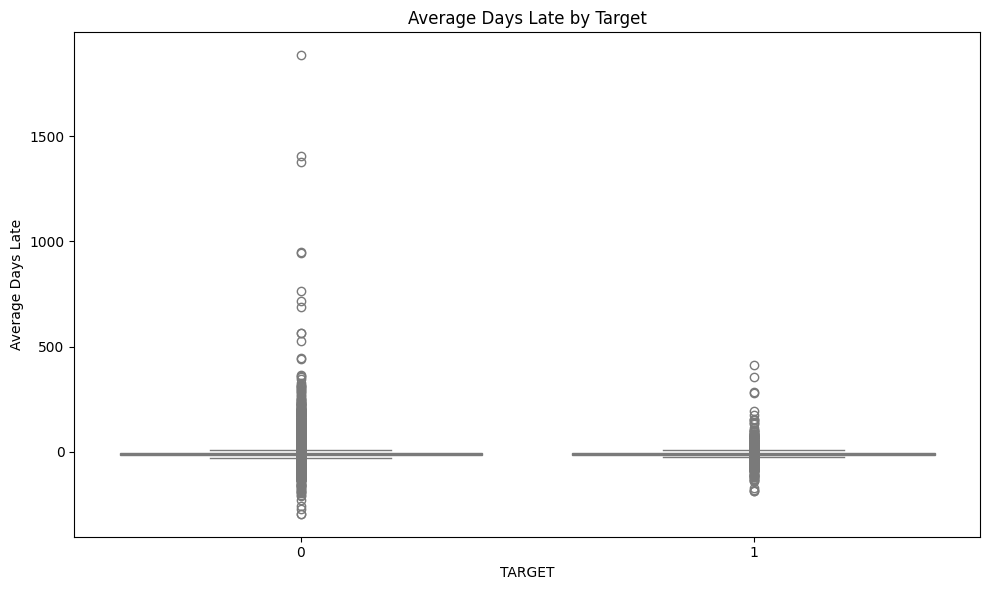

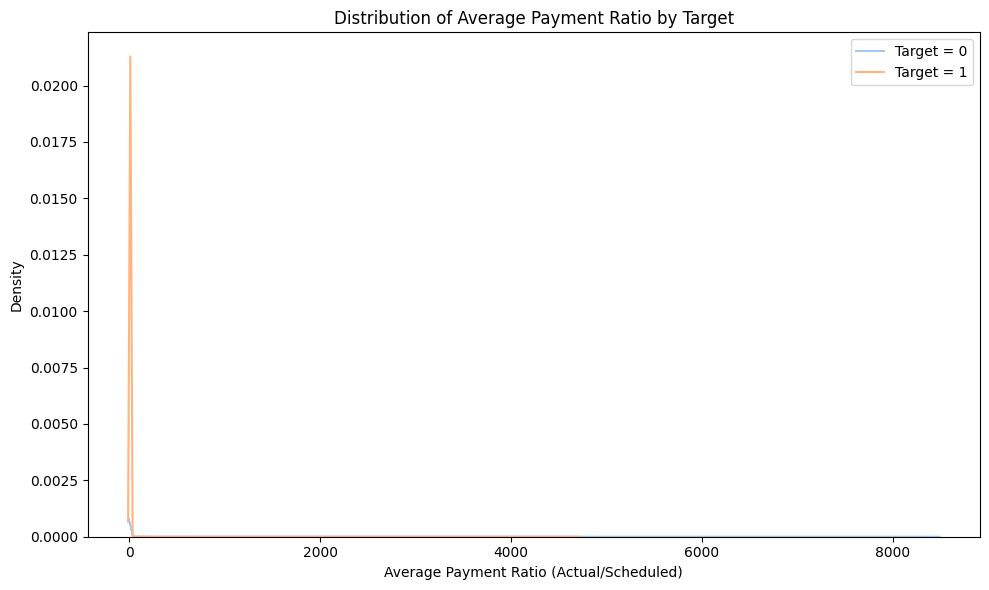

In [50]:
install_agg = installments.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'nunique',
    'NUM_INSTALMENT_NUMBER': ['max', 'mean', 'std'],
    'DAYS_INSTALMENT': ['min', 'max', 'mean'],
    'DAYS_ENTRY_PAYMENT': ['min', 'max', 'mean'],
    'AMT_INSTALMENT': ['min', 'max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
})

# Create payment difference features
installments['PAYMENT_DIFF'] = installments['AMT_PAYMENT'] - installments['AMT_INSTALMENT']
installments['PAYMENT_RATIO'] = installments['AMT_PAYMENT'] / installments['AMT_INSTALMENT']
installments['DAYS_LATE'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']

# Aggregate new features
install_agg_ext = installments.groupby('SK_ID_CURR').agg({
    'PAYMENT_DIFF': ['min', 'max', 'mean', 'std', 'sum'],
    'PAYMENT_RATIO': ['min', 'max', 'mean', 'std'],
    'DAYS_LATE': ['max', 'mean', 'std', 'sum']
})

# Flatten column names for merging
install_agg_ext_flat = install_agg_ext.copy()
install_agg_ext_flat.columns = ['_'.join(col).strip() for col in install_agg_ext_flat.columns.values]

# Merge with target for analysis
install_with_target = install_agg_ext_flat.reset_index().merge(
    application_train[['SK_ID_CURR', 'TARGET']], 
    on='SK_ID_CURR', how='inner'
)

# Boxplot of average days late by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='DAYS_LATE_mean', data=install_with_target)
plt.title('Average Days Late by Target')
plt.ylabel('Average Days Late')
plt.tight_layout()
plt.show()

# Distribution of payment ratio by target
plt.figure(figsize=(10, 6))
for target in [0, 1]:
    sns.kdeplot(
        install_with_target.loc[install_with_target['TARGET'] == target, 'PAYMENT_RATIO_mean'],
        label=f'Target = {target}'
    )
plt.title('Distribution of Average Payment Ratio by Target')
plt.xlabel('Average Payment Ratio (Actual/Scheduled)')
plt.legend()
plt.tight_layout()
plt.show()

## How to interpret:

The boxplot shows whether clients who default (TARGET=1) tend to pay later than those who don't default (TARGET=0). A higher median for TARGET=1 would indicate that payment delays are associated with default risk.

The distribution plot shows how payment ratios differ between defaulting and non-defaulting clients. Differences in the distributions indicate that consistently underpaying (ratio < 1) or overpaying (ratio > 1) may be predictive of default.

## Feature Distribution by Target

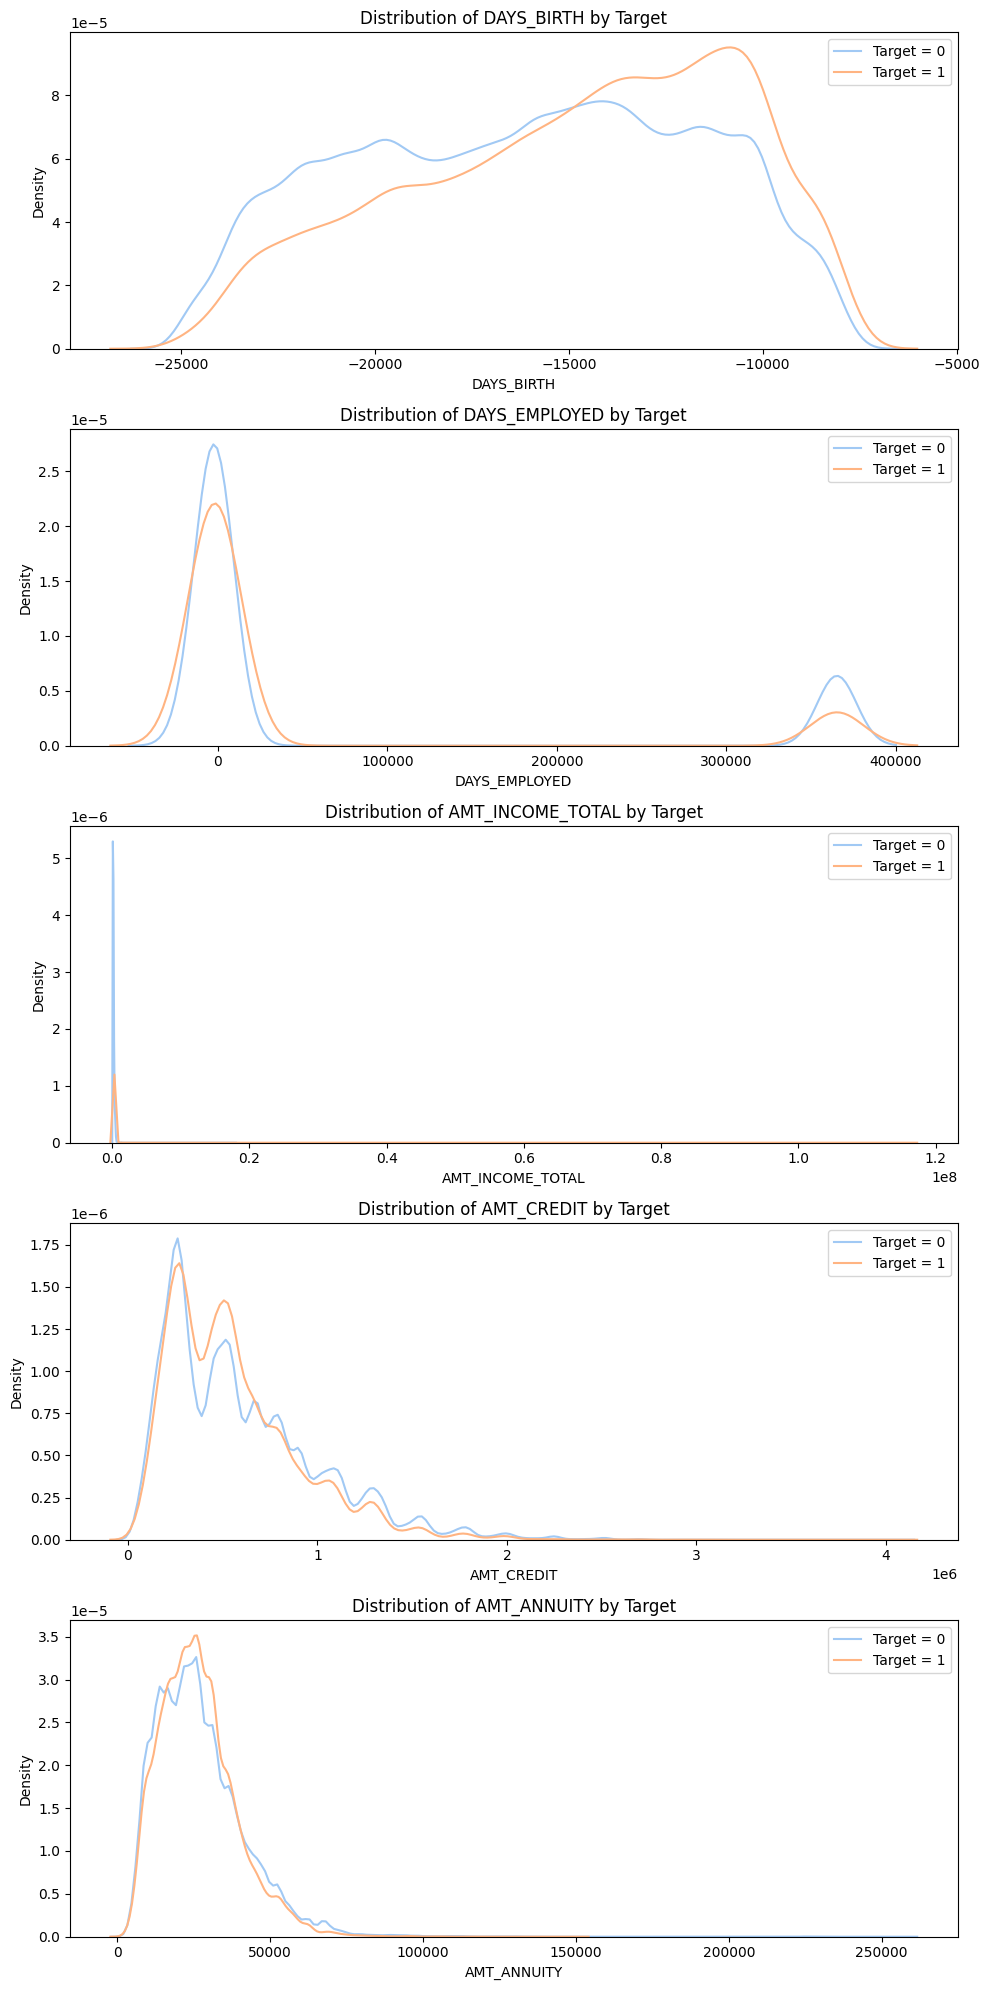

In [45]:
# Select interesting features
features_to_plot = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

# Plot distributions by target
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(10, 4*len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    for target in [0, 1]:
        sns.kdeplot(
            application_train.loc[application_train['TARGET'] == target, feature],
            ax=axes[i],
            label=f'Target = {target}'
        )
    axes[i].set_title(f'Distribution of {feature} by Target')
    axes[i].legend()
    
plt.tight_layout()
plt.show()

## How to interpret: 

These plots show how key features distribute differently between defaulting and non-defaulting clients. Significant differences in these distributions indicate features that might be predictive of default risk:

DAYS_BIRTH: Examining if age relates to default risk

DAYS_EMPLOYED: Analyzing employment stability's impact on default

AMT_INCOME_TOTAL: Assessing income level's relationship with default

AMT_CREDIT: Evaluating credit amount's correlation with default

AMT_ANNUITY: Examining annuity payment's effect on default

## Previous Application Analysis


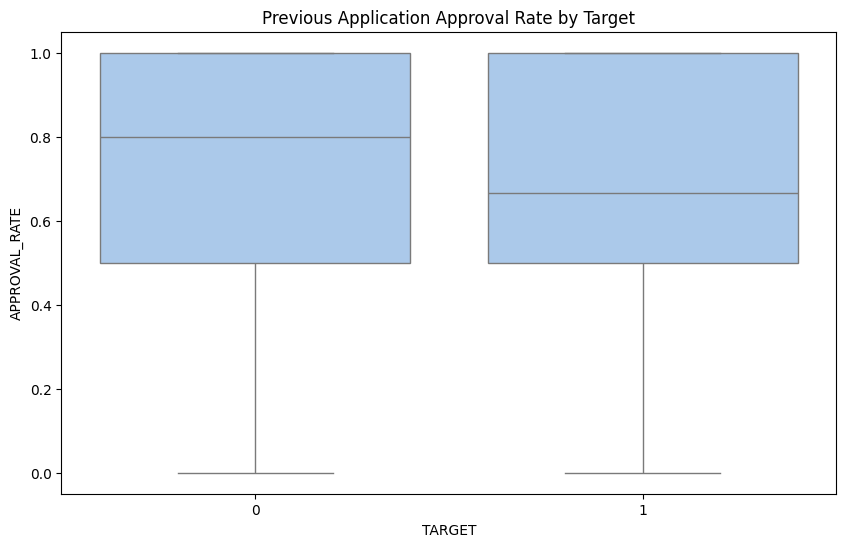

In [46]:
# Combine previous application info with current applications
prev_agg = prev_app.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['min', 'max', 'mean'],
})

# Calculate approval rate
prev_app['APPROVED'] = prev_app['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if x == 'Approved' else 0)
approval_rates = prev_app.groupby('SK_ID_CURR')['APPROVED'].mean().reset_index()
approval_rates.columns = ['SK_ID_CURR', 'APPROVAL_RATE']

# Merge with target
approval_analysis = application_train[['SK_ID_CURR', 'TARGET']].merge(
    approval_rates, on='SK_ID_CURR', how='left')

# Plot approval rate vs target
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='APPROVAL_RATE', data=approval_analysis)
plt.title('Previous Application Approval Rate by Target')
plt.show()

## How to interpret: 

This analysis examines how previous application history relates to default risk. The boxplot shows if clients who default have different approval rates for their previous applications compared to non-defaulting clients. A lower median approval rate for defaulting clients would suggest that previous rejections might be predictive of future default.